# Compute performance metrics for the given Y and Y_score without sklearn

In [17]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [18]:
df_a=pd.read_csv('5_a.csv')
df_a.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


## CONVERTING PROBABILITIES TO OUTPUT LABEL

In [19]:
def convert_prob2label(prob,threshold):
    # prob : list of predicted output
    #threshold : threshold value to make output 1 or 0
    return list(np.where(np.array(prob) > threshold, 1, 0))

## FUNCTION TO GET CONFUSION MATRIX WHICH INCLUDE TRUE POSITIVE, TRUE NEGATIVE, FALSE POSITIVE, FALSE NEGATIVE

In [20]:
def confusion_matrix(true_label, predicted_prob):
    #true_label : list of predefined true label
    #predicted_prob : list of output predicted probabilities
    predicted_label= convert_prob2label(predicted_prob, 0.5) # converting output predicted probabilities to label with threshold= 0.5
    T_N = 0  # initializing True negative value
    T_P = 0  # initializing True positive value
    F_P = 0  # initializing false positive value
    F_N = 0  # initializing false negative value
    conf_mat = np.array([[0,0],[0,0]])   # initializing confusion matrix
    for i in range(len(true_label)):
        if true_label[i] == 0 and predicted_label[i] == 0:
            T_N += 1
        elif true_label[i] == 1 and predicted_label[i] == 1:
            T_P += 1
        elif true_label[i] == 1 and predicted_label[i] == 0:
            F_N += 1
        else: 
            F_P += 1

    conf_mat[0,0]= T_N
    conf_mat[0,1]= F_N
    conf_mat[1,0]= F_P
    conf_mat[1,1]= T_P
    return T_N, F_N, F_P, T_P, conf_mat

## COMPUTING F1 SCORE

In [21]:
def F1_score(a,b):
    # a : list of true label
    # b : list of predicted probabilities
    T_N, F_N, F_P, T_P, _ = confusion_matrix(a, b)
    precision = T_P / (T_P+F_P)   # precision value
    recall = T_P / (F_N+T_P)      # recall value
    f1_score = (2* precision * recall)/ (precision+recall)
    return f1_score

## FUNCTION TO GET TPR/FPR FOR ROC CURVE

In [22]:
def ROC_Curve_TPR_FPR(true_label, predicted_prob):
    # true_label : list of true label
    # predicted_prob : list of predicted probabilities
    lst_threshold = sorted(predicted_prob, reverse=True)  # To order predicted_prob in descending order to get threshold value
    TPR = []     # initializing list of TPR to build ROC curve
    FPR = []     # initializing list of FPR to build ROC curve
    for threshold in lst_threshold:
        predicted_label = convert_prob2label(predicted_prob,threshold)
        T_N, F_N, F_P, T_P, _ = confusion_matrix(true_label, predicted_label)
        TPR.append(T_P / (F_N + T_P))
        FPR.append(F_P / (T_N +F_P))
    return TPR, FPR

## FUNCTION TO DISPLAY ROC CURVE

In [23]:
def display_ROC_curve(TPR,FPR):
    df_roc= pd.DataFrame({'tpr': TPR, 'fpr': FPR })
    df_roc.plot(x= 'fpr', y= 'tpr')
    return

## COMPUTING AUC SCORE

In [24]:
def auc_score(TPR, FPR):
    return np.trapz(TPR, FPR)

In [54]:
def accuracy_score(true_label, predicted_prob):
    accuracy= 0
    predicted_label= convert_prob2label(predicted_prob, 0.5)
    return np.sum(np.where(np.array(true_label) == np.array(predicted_label) , 1 , 0)) / len(true_label)

## CONFUSION MATRIX

In [26]:
T_N, F_N, F_P, T_P, conf_mat = confusion_matrix((df_a['y'].astype(int)).tolist(), df_a['proba'].tolist())
conf_mat

array([[    0,     0],
       [  100, 10000]])

## F1-SCORE

In [27]:
f1_score = F1_score((df_a['y'].astype(int)).tolist(),df_a['proba'].tolist())
f1_score

0.9950248756218906

Though f1 score is good but as data is imbalanced we do not give importance to f1 score, we will check auc score.

## PLOTTING ROC-CURVE

In [28]:
TPR, FPR = ROC_Curve_TPR_FPR((df_a['y'].astype(int)).tolist(), df_a['proba'].tolist())

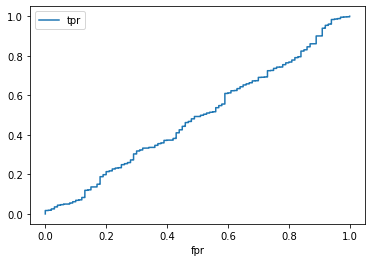

In [29]:
display_ROC_curve(TPR, FPR)

As we can see the curve is similar to y=x line so the model is worse.

## AUC-SCORE

In [30]:
print('AUC Score:' + str(auc_score(TPR, FPR)))

AUC Score:0.48829900000000004


## ACCURACY SCORE

In [55]:
print('Accuracy Score:' + str(accuracy_score((df_a['y'].astype(int)).tolist(), df_a['proba'].tolist())) )

Accuracy Score:0.9900990099009901


Though the accuracy is high but the model is dumb, So we will look at AUC-Score.



## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [32]:
df_b=pd.read_csv('5_b.csv')
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


## CONFUSION MATRIX

In [33]:
T_N, F_N, F_P, T_P, conf_mat = confusion_matrix((df_b['y'].astype(int)).tolist(), df_b['proba'].tolist())
print('confusion matrix: ' +str(conf_mat))

confusion matrix: [[9761   45]
 [ 239   55]]


## F1-SCORE

In [34]:
f1_score = F1_score((df_b['y'].astype(int)).tolist(),df_b['proba'].tolist())

In [35]:
f1_score

0.2791878172588833

## PLOTTING ROC-CURVE

In [36]:
TPR, FPR = ROC_Curve_TPR_FPR((df_b['y'].astype(int)).tolist(), df_b['proba'].tolist())

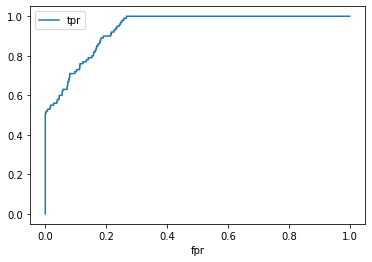

In [37]:
display_ROC_curve(TPR, FPR)

Looking at ROC curve, we can say the model is quite good.

## AUC-SCORE

In [51]:
print('AUC Score:' + str(auc_score(TPR, FPR)))

AUC Score:0.9376570000000001


## ACCURACY SCORE

In [56]:
print('Accuracy Score:' + str(accuracy_score((df_b['y'].astype(int)).tolist(), df_b['proba'].tolist())))

Accuracy Score:0.9718811881188119


### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [39]:
df_c=pd.read_csv('5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


## FUNCTION TO GET BEST THRESHOLD VALUE FOR SMALLER 'A'

In [40]:
def best_threshold_fn(true_label,predicted_prob):
    best_threshold= 0
    prev_A=1e8
    lst_threshold= sorted(predicted_prob, reverse=True)

    for threshold in lst_threshold:
        predicted_label = convert_prob2label(predicted_prob,threshold)
        T_N, F_N, F_P, T_P, _ = confusion_matrix(true_label, predicted_label)
        A = 500 * F_N + 100 * F_P
        if A < prev_A : 
            best_threshold = threshold
            prev_A = A
    return best_threshold

In [41]:
best_threshold = best_threshold_fn((df_c['y'].astype(int)).tolist(),df_c['prob'].tolist())

## PRINT BEST THRESHOLD VALUE

In [42]:
print('Best threshold value :' +str(best_threshold))

Best threshold value :0.2298716443615991


In [43]:
 # write your code for task C


## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [44]:
df_d=pd.read_csv('5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


## COMPUTING MEAN SQUARED ERROR

In [45]:
def MSE(a,b):
    return (1/len(a)) * np.sum(np.square(a-b))

## COMPUTING MEAN ABSOLUTE SCALED ERROR

In [57]:
def MASE(a,b):
    return (1/np.sum(np.array(a))) * np.sum(np.absolute((a-b)))

## COMPUTING R-SQUARED ERROR

In [47]:
def R_squared(a,b):
    mean_y = np.mean(a)
    SS_res = np.sum(np.square(a-b))
    SS_tot = np.sum(np.square(a-mean_y))
    return (1 - (SS_res/SS_tot))

In [48]:
print('mean square error :' + str(MSE(df_d['y'], df_d['pred'])))

mean square error :177.16569974554707


In [58]:
print('MASE :' + str(MASE(df_d['y'], df_d['pred'])))

MASE :0.1291202994009687


In [50]:
print('R_squared error :' + str(R_squared(df_d['y'], df_d['pred'])))

R_squared error :0.9563582786990937


As there is no way to check if mse and mase is good or not, so we
calculate R-squared error, good or bad depend on the application, R^2
error = 1 is the best value. So for this question R2 error is close to 1
, So model is good.